# Part 1: Data Preprocessing

In [1]:
# Data Preprocessing
import pandas as pd
import numpy as np
# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
# Data Modeling
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
# Model Evaluation and Comparison
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv("Resources/tmdb_5000_movies.csv", index_col=0)

df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast
0,237000000,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,19995,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...",...,2787965087,162.0,"English, Español",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"Sam Worthington, Zoe Saldana, Sigourney Weaver..."
1,300000000,"Adventure, Fantasy, Action",http://disney.go.com/disneypictures/pirates/,285,"ocean, drug abuse, exotic island, east india t...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",...,961000000,169.0,English,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"Johnny Depp, Orlando Bloom, Keira Knightley, S..."
2,245000000,"Action, Adventure, Crime",http://www.sonypictures.com/movies/spectre/,206647,"spy, based on novel, secret agent, sequel, mi6...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures, Danjaq, B24",...,880674609,148.0,"Français, English, Español, Italiano, Deutsch",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"Daniel Craig, Christoph Waltz, Léa Seydoux, Ra..."
3,250000000,"Action, Crime, Drama, Thriller",http://www.thedarkknightrises.com/,49026,"dc comics, crime fighter, terrorist, secret id...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"Legendary Pictures, Warner Bros., DC Entertain...",...,1084939099,165.0,English,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"Christian Bale, Michael Caine, Gary Oldman, An..."
4,260000000,"Action, Adventure, Science Fiction",http://movies.disney.com/john-carter,49529,"based on novel, mars, medallion, space travel,...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,...,284139100,132.0,English,Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"Taylor Kitsch, Lynn Collins, Samantha Morton, ..."


In [3]:
df.shape

(4803, 22)

In [4]:
# Creating the 'profitable' column
df['profitable'] = df.revenue > df.budget
df['profitable'] = df['profitable'].astype(int)

In [5]:
# Printing the types of Value and their Count in the 'profitable' column 
df["profitable"].value_counts()

1    2585
0    2218
Name: profitable, dtype: int64

In [6]:
#number of missing values in the dataset
df.isnull().sum()

budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies     351
production_countries     174
release_date               1
revenue                    0
runtime                    2
spoken_languages          87
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
movie_id                   0
cast                      43
profitable                 0
dtype: int64

In [7]:
# Is the Original Title column needed or not
df[df['original_title'] != df['title']][['title', 'original_title']].head()

,title,original_title
97,Shin Godzilla,シン・ゴジラ
215,Fantastic 4: Rise of the Silver Surfer,4: Rise of the Silver Surfer
235,Asterix at the Olympic Games,Astérix aux Jeux Olympiques
317,The Flowers of War,金陵十三釵
474,Evolution,Évolution


In [8]:
# Dropping the unimportant columns 
df.drop(['homepage','production_companies', 'production_countries', 'spoken_languages', 'original_title'], axis=1, inplace=True)

In [9]:
# Checking the number of values for which "Revenue" column contains "0"
df[df['revenue'] == 0].shape

(1427, 18)

In [10]:
# Checking the amount of null values present in Budget column
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['budget'] = df['budget'].replace(0, np.nan)
df[df['budget'].isnull()].shape

(1037, 18)

In [11]:
# Creating a column which shows the return from the movie production and checking the amount of null values  
df['return'] = df['revenue'] / df['budget']
df[df['return'].isnull()].shape

(1037, 19)

In [12]:
# Replacing any infinite values with np.nan and then dropping all rows of data containing missing values
df = df.replace([np.inf, -np.inf], np.nan)
df.dropna(how="any", inplace=True)

In [13]:
# Checking the final dimensions of the dataset
df.shape

(3266, 19)

In [14]:
df.isnull().sum()

budget               0
genres               0
id                   0
keywords             0
original_language    0
overview             0
popularity           0
release_date         0
revenue              0
runtime              0
status               0
tagline              0
title                0
vote_average         0
vote_count           0
movie_id             0
cast                 0
profitable           0
return               0
dtype: int64

In [15]:
# Determining and Storing the Genres
list_genres = df.genres.apply(lambda x: x.split(","))
genres = []

for row in list_genres:
    row = [genre.strip() for genre in row]
    for genre in row:
        if genre not in genres:
            genres.append(genre)

# Encoding the Genres
for genre in genres:
    df[genre] = df['genres'].str.contains(genre).astype(int)

df[genres]

,Action,Adventure,Fantasy,Science Fiction,Crime,Drama,Thriller,Animation,Family,Western,Comedy,Romance,Horror,Mystery,History,War,Music,Documentary,Foreign,TV Movie
0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4788,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
4791,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4792,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0
4796,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
df['release_date'].head()

0    2009-12-10
1    2007-05-19
2    2015-10-26
3    2012-07-16
4    2012-03-07
Name: release_date, dtype: object

In [17]:
df['year'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0])

In [18]:
df['year'].isnull().sum()

0

## Feature Selection

In [19]:
regression_target = 'revenue'
classification_target = 'profitable'

In [21]:
# For Graphs and its labels to be printed on a White Frame
sns.set_style('whitegrid') 
# For increasing the scale of the font of the Labels of the Graphs
sns.set(font_scale=1.25) 

budget          2.103303
popularity      9.326919
runtime         1.716690
vote_count      3.256260
vote_average   -0.707662
revenue         3.852964
profitable     -0.842966
dtype: float64


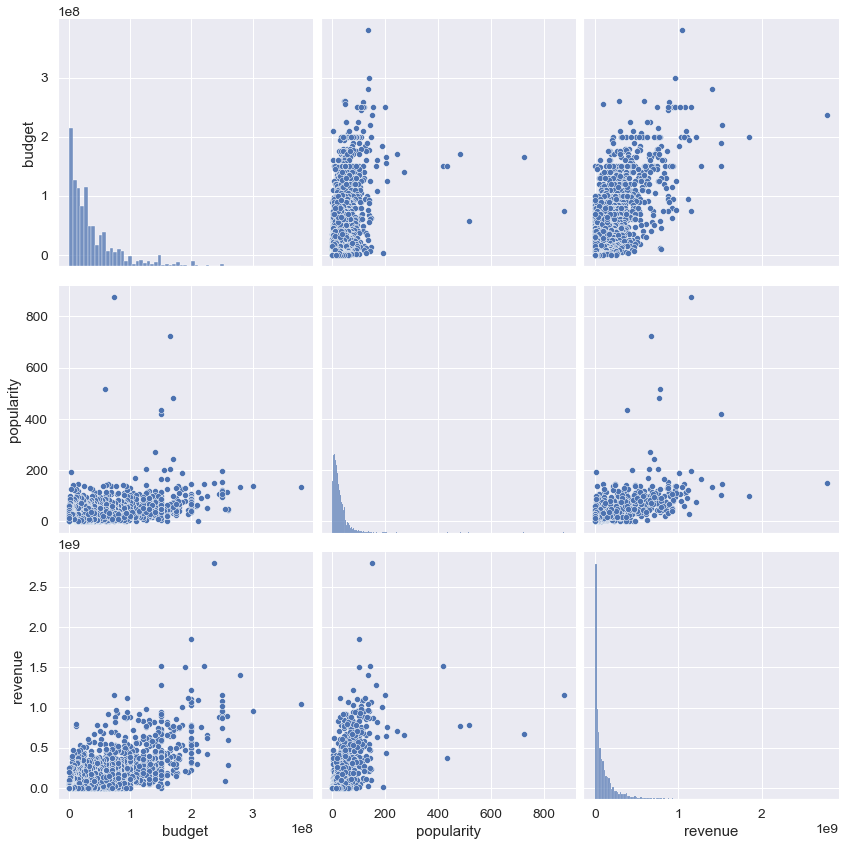

In [22]:
continuous = ['budget', 'popularity', 'runtime', 'vote_count', 'vote_average']
outcomes = continuous + [regression_target, classification_target]
plotting_variables = ['budget', 'popularity', regression_target]

sns.pairplot(data=df[plotting_variables], height=4)

# determining the skew.
print(df[outcomes].skew())

## Feature Transformation -- Eliminating Skewness

In [23]:
# Eliminating skewness for each Variable
for variable in ['budget', 'popularity', 'runtime', 'vote_count', 'revenue']:
    df[variable] = df[variable].apply(lambda x: np.log10(1+x))

budget         -3.117974
popularity     -0.325490
runtime        -4.081196
vote_count     -0.451869
vote_average   -0.707662
revenue        -2.164551
profitable     -0.842966
dtype: float64


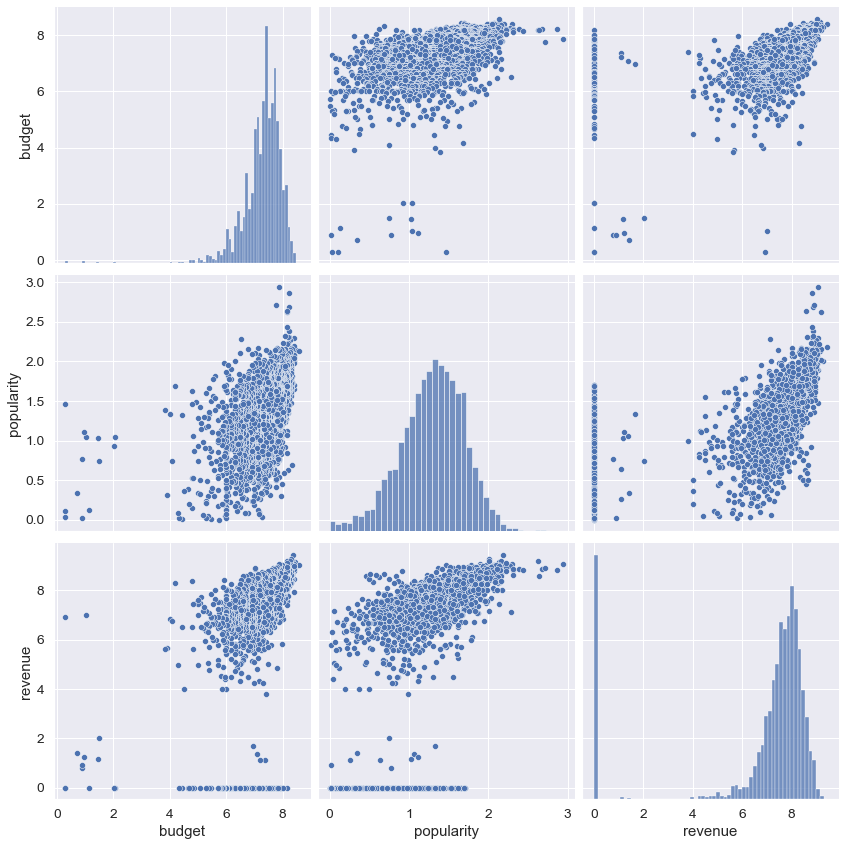

In [24]:
sns.pairplot(data=df[plotting_variables], height=4)

print(df[outcomes].skew())

In [25]:
# Enter your code here
df.to_csv("Resources/movies_clean.csv")

# Part 2: Exploratory Data Analysis

In [28]:
# Reading the cleaned dataset
df_clean = pd.read_csv("Resources/movies_clean.csv", index_col=0)
df_clean.head()

,budget,genres,id,keywords,original_language,overview,popularity,release_date,revenue,runtime,...,Romance,Horror,Mystery,History,War,Music,Documentary,Foreign,TV Movie,year
0,8.374748,"Action, Adventure, Fantasy, Science Fiction",19995,"culture clash, future, space war, space colony...",en,"In the 22nd century, a paraplegic Marine is di...",2.180234,2009-12-10,9.445287,2.212188,...,0,0,0,0,0,0,0,0,0,2009
1,8.477121,"Adventure, Fantasy, Action",285,"ocean, drug abuse, exotic island, east india t...",en,"Captain Barbossa, long believed to be dead, ha...",2.146384,2007-05-19,8.982723,2.230449,...,0,0,0,0,0,0,0,0,0,2007
2,8.389166,"Action, Adventure, Crime",206647,"spy, based on novel, secret agent, sequel, mi6...",en,A cryptic message from Bond’s past sends him o...,2.034936,2015-10-26,8.944815,2.173186,...,0,0,0,0,0,0,0,0,0,2015
3,8.397940,"Action, Crime, Drama, Thriller",49026,"dc comics, crime fighter, terrorist, secret id...",en,Following the death of District Attorney Harve...,2.054280,2012-07-16,9.035405,2.220108,...,0,0,0,0,0,0,0,0,0,2012
4,8.414973,"Action, Adventure, Science Fiction",49529,"based on novel, mars, medallion, space travel,...",en,"John Carter is a war-weary, former military ca...",1.652507,2012-03-07,8.453531,2.123852,...,0,0,0,0,0,0,0,0,0,2012


In [30]:
# Analysing all the features from a statistical point of view
df_clean.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id,profitable,return,...,Romance,Horror,Mystery,History,War,Music,Documentary,Foreign,TV Movie,year
count,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3.266000e+03,...,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000
mean,7.278334,45488.042254,1.292131,6.855850,2.038060,6.271341,2.604175,45488.042254,0.694121,2.919456e+03,...,0.176363,0.115738,0.085119,0.040416,0.033068,0.034293,0.009186,0.001225,0.000612,2001.765769
std,0.740971,77053.912258,0.405928,2.486905,0.082333,0.894677,0.631083,77053.912258,0.460849,1.497546e+05,...,0.381187,0.319959,0.279102,0.196964,0.178841,0.182008,0.095415,0.034980,0.024742,12.953301
min,0.301030,5.000000,0.000688,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1916.000000
25%,7.000000,5307.500000,1.041590,7.030228,1.986772,5.700000,2.204120,5307.500000,0.000000,7.362006e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1998.000000
50%,7.397940,11317.000000,1.317127,7.695402,2.029384,6.300000,2.645913,11317.000000,1.000000,2.085807e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2005.000000
75%,7.740363,44698.250000,1.575985,8.146561,2.082785,6.900000,3.042477,44698.250000,1.000000,4.180151e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2010.000000
max,8.579784,417859.000000,2.942792,9.445287,2.530200,8.500000,4.138397,417859.000000,1.000000,8.500000e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2016.000000


<AxesSubplot:>

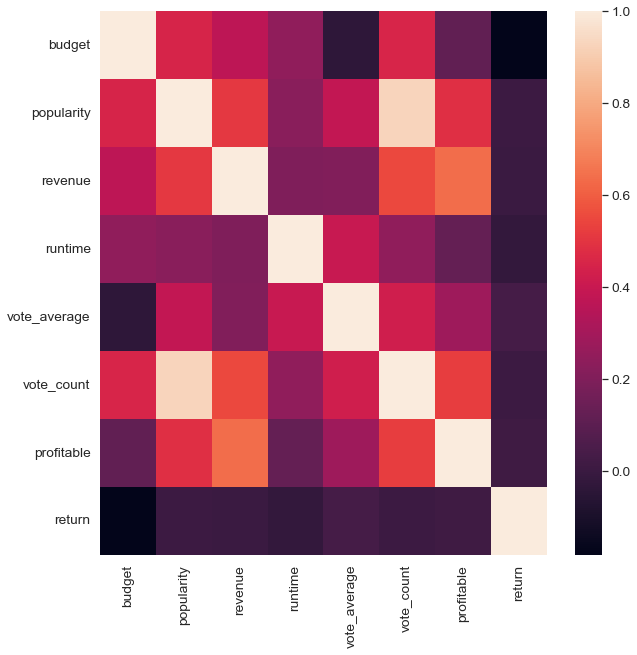

In [32]:
# Plotting the correlation heatmap of all the features
plt.figure(figsize=(10, 10))
sns.heatmap(df_clean.iloc[:,:19].drop(['id', 'movie_id'], axis=1).corr())

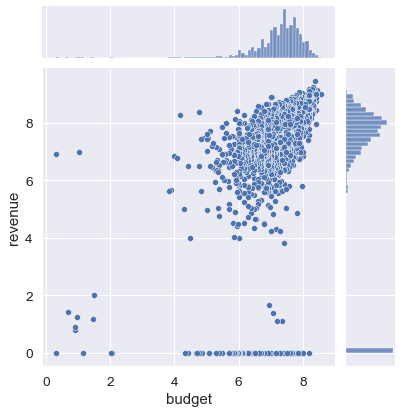

In [33]:
# plotting the correlation graph between revenue and budget
sns.jointplot(x='budget', y='revenue', data=df_clean)

The relation is mostly linear

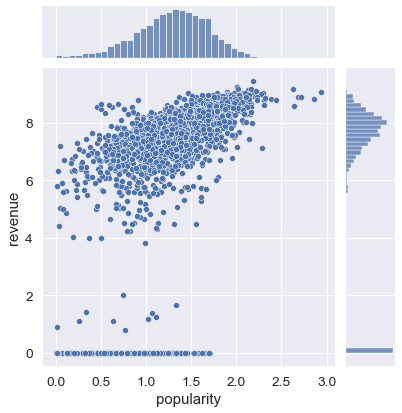

In [34]:
# plotting the correlation graph between revenue and popularity
sns.jointplot(x='popularity', y='revenue', data=df_clean)

The relation is mostly linear

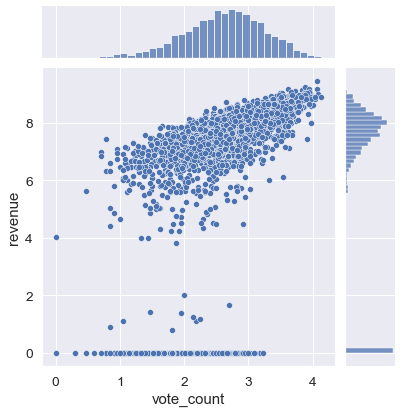

In [35]:
# plotting the correlation graph between revenue and vote_count
sns.jointplot(x='vote_count', y='revenue', data=df_clean)

In [38]:
# Define all variables and outcomes from `df`.
regression_target = 'revenue'
classification_target = 'profitable'
all_variables = ['budget', 'popularity', 'runtime', 'vote_count', 'vote_average', 'Action', 'Adventure', 'Fantasy', 
                  'Science Fiction', 'Crime', 'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy', 'Romance', 
                  'Horror', 'Mystery', 'War', 'History', 'Music', 'Documentary', 'TV Movie', 'Foreign']

regression_outcome = df[regression_target]
classification_outcome = df[classification_target]
variables = df[all_variables]

# Instantiate all regression models and classifiers.
linear_regression = LinearRegression(fit_intercept=True, normalize=True)
logistic_regression = LogisticRegression(max_iter=1000)
forest_regression = RandomForestRegressor(max_depth=4, random_state=0)
forest_classifier = RandomForestClassifier(max_depth=4, random_state=0)